In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys
sys.path.append("../../") 
from wfslib.geometry import Geometry
from wfslib.wfs import WFSData

### Крупная сетка засвеченная полностью 

../..\wfslib\wfs.py:139: UserWarning: WARNING: Set the geometry for the file!
  warn("WARNING: Set the geometry for the file!", UserWarning)


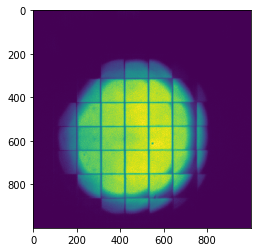

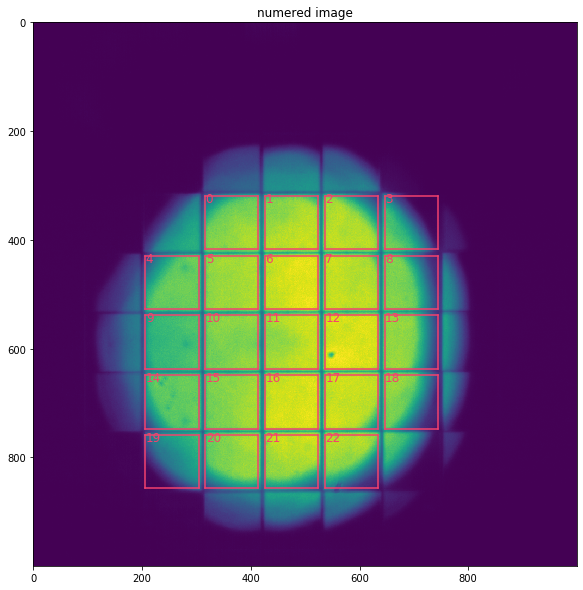

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wfslib.wfs import WFSData

path = "../data/bad_img3.tiff"

arr = np.array(Image.open(path))[500:1500, 500:1500]
arr = np.expand_dims(arr, 0)
wfs = WFSData(arr)
wfs.geometry.set_options(shift=(-22, -36))
wfs.reference = 27
wfs.good_only = True
plt.imshow(arr[0])
wfs.show_geometry()

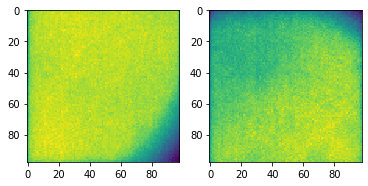

In [3]:
#print(str (wfs[0].get_offset(43)))
wfs.mask = True
plt.subplot(1,2,1)
plt.imshow(wfs[0][17])
plt.subplot(1,2,2)
plt.imshow(wfs[0][1])

### Крупная сетка хасвеченная диагонально

../..\wfslib\wfs.py:139: UserWarning: WARNING: Set the geometry for the file!
  warn("WARNING: Set the geometry for the file!", UserWarning)


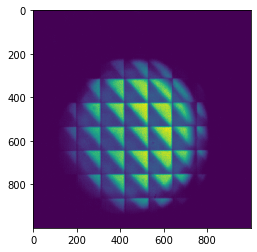

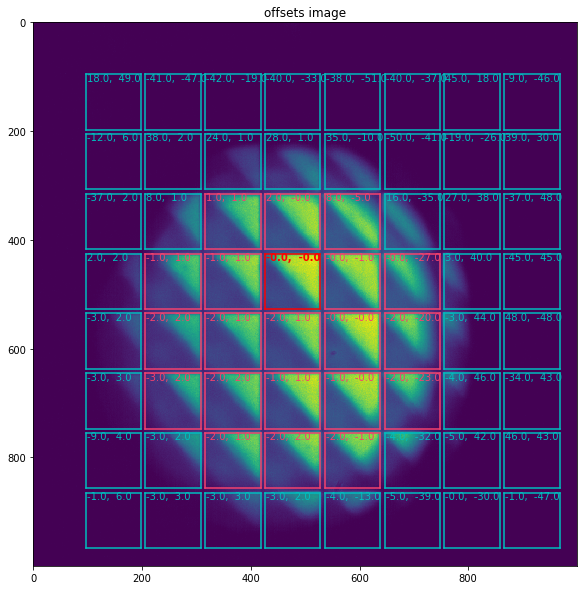

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wfslib.wfs import WFSData

path = "../data/bad_img1.tiff"

arr = np.array(Image.open(path))[500:1500, 500:1500]
arr = np.expand_dims(arr, 0)
wfs = WFSData(arr)
wfs.geometry.set_options(shift=(-65, -15))
wfs.reference = 27

plt.imshow(arr[0])
wfs.show_geometry(show_type = "offsets")

### Мелкая сетка полностью засвеченная

3
{'border': 8.0, 'cell_width': 32.0, 'start_point': [139, 99]}


../..\wfslib\wfs.py:139: UserWarning: WARNING: Set the geometry for the file!
  warn("WARNING: Set the geometry for the file!", UserWarning)


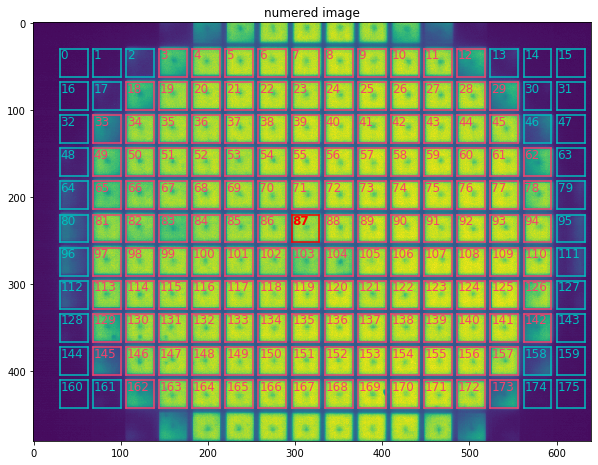

[0. 0.]


In [5]:
wfs = WFSData('../data/file.h5', dataset_name = "data")
#wfs.close_stream()
p = wfs.geometry.options
print(p)
wfs.geometry.set_options( shift = (-1,1), border = 6)
wfs.reference = 87
#wfs.domask = True

wfs.show_geometry()
wfs.offsets()

#    plt.imshow(wfs[0][172])    
print(wfs[1].get_offset(130))


### Точки

../..\wfslib\wfs.py:139: UserWarning: WARNING: Set the geometry for the file!
  warn("WARNING: Set the geometry for the file!", UserWarning)


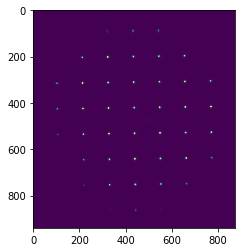

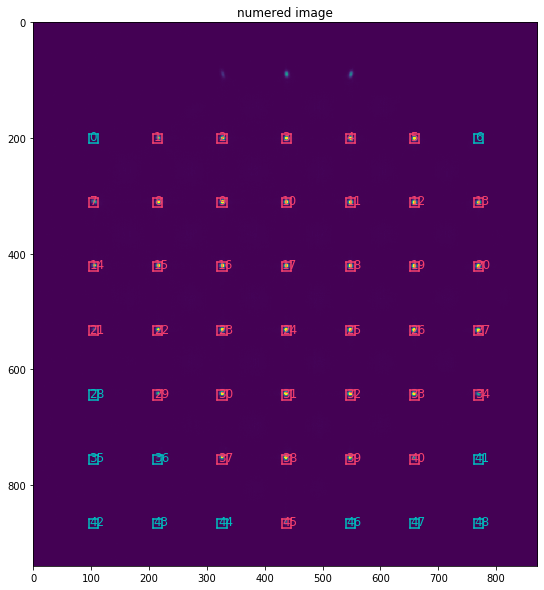

In [6]:


path = "../data/bad_img2.tiff"

arr = np.array(Image.open(path))
arr = np.expand_dims(arr, 0)

plt.imshow(arr[0])
wfs = WFSData(arr)
wfs.geometry.set_options(shift=(64, -38),swap = True, rotate = 1)

#plt.imshow(arr[0])
wfs.show_geometry()

## Bims

In [7]:
def read_bim(path):
    with open(path, "rb") as f:
        ny = int.from_bytes(f.read(4), "little")
        nx = int.from_bytes(f.read(4), "little")
        return np.frombuffer(f.read()).reshape(ny, nx)

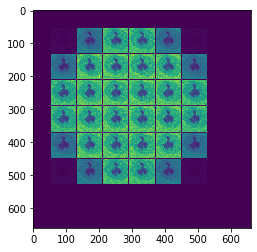

In [8]:
bim_img = read_bim("../data/bims/lsvt-z2=-2.bim").copy()
plt.imshow(bim_img)

../..\wfslib\wfs.py:139: UserWarning: WARNING: Set the geometry for the file!
  warn("WARNING: Set the geometry for the file!", UserWarning)


{'border': 4.0, 'cell_width': 76.0, 'start_point': [185, 167]}


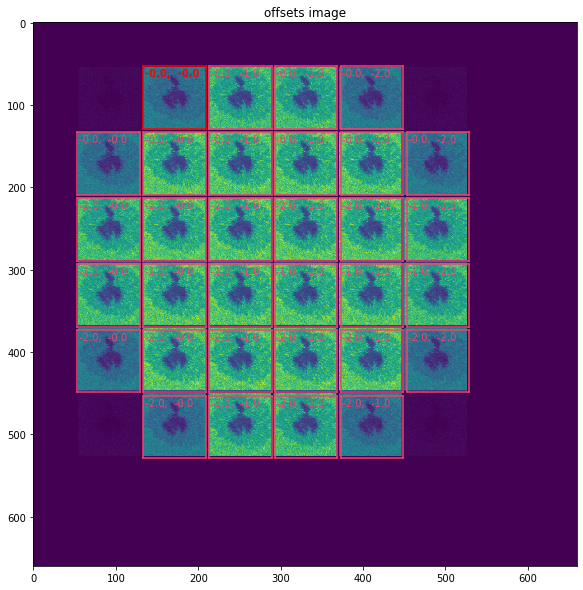

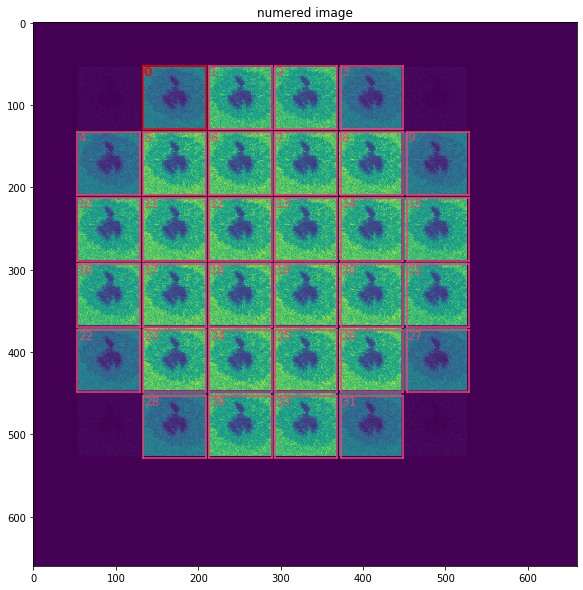

In [9]:
wfs = WFSData(bim_img)

p = wfs.geometry.options
print(p)
wfs.geometry.set_options(shift=(-56, -38))

wfs.good_only = True
wfs.reference = 0
#plt.imshow(arr[0])
wfs.show_geometry(show_type = "offsets")
wfs.show_geometry()

### Разные функции качества

In [10]:
def qualitative_sub_std(cell, std, mean_val):
        return np.mean(cell) > std
    
def qualitative_sub_mean(cell, std, mean_val):
        return np.mean(cell) > mean_val

def qualitative_sub_median(cell, std, mean_val):
    return np.median(cell) > mean_val

../..\wfslib\wfs.py:139: UserWarning: WARNING: Set the geometry for the file!
  warn("WARNING: Set the geometry for the file!", UserWarning)


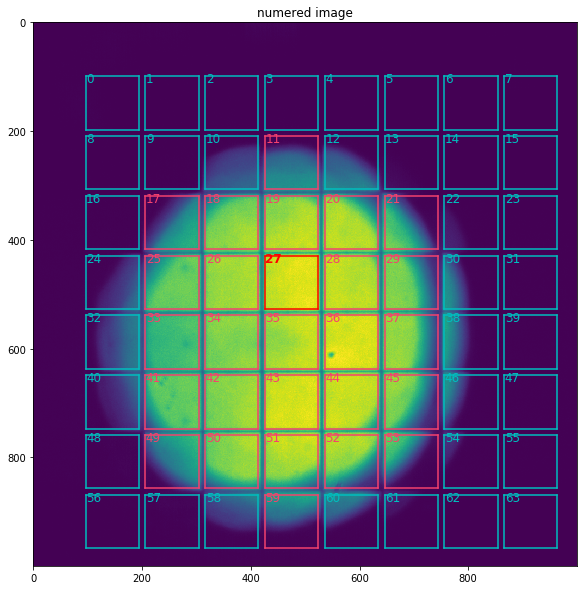

In [14]:

path = "../data/bad_img3.tiff"

arr = np.array(Image.open(path))[500:1500, 500:1500]
arr = np.expand_dims(arr, 0)
wfs = WFSData(arr)
wfs.geometry.set_options(shift=(-22, -36))
wfs.qualitative_function = qualitative_sub_mean
wfs.reference = 27

wfs.show_geometry()

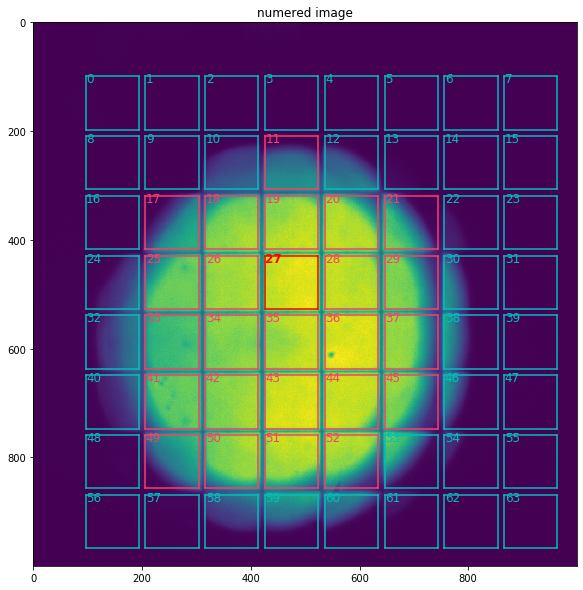

In [15]:
wfs.qualitative_function = qualitative_sub_median
wfs.show_geometry()

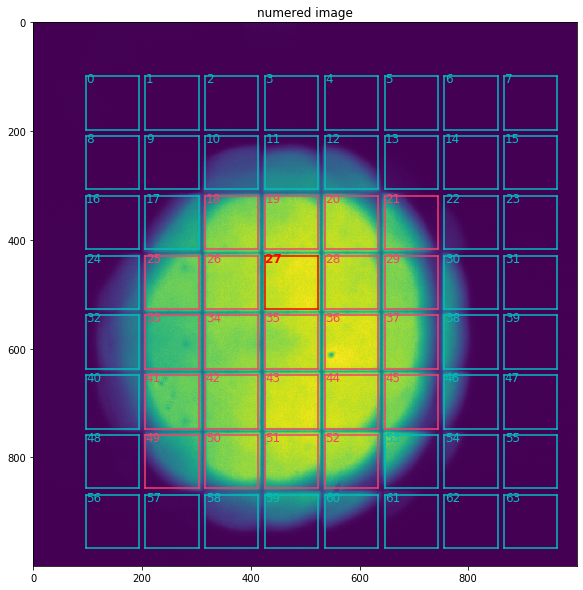

In [16]:
wfs.qualitative_function = qualitative_sub_std
wfs.show_geometry()